**Import data**

In [273]:
# Interactive plotting 
%pylab inline

# Data initialize
X = np.loadtxt('Data/train.csv',  delimiter=',', skiprows=1, usecols=range(2, 14))
y = np.loadtxt('Data/train.csv', delimiter=',', skiprows=1, usecols=[14])

temp = X[:,8]
print(temp)    # just checking it's the right column
atemp = X[:,9]
hum = X[:,10]
windspeed = X[:,11]
print(y)

Populating the interactive namespace from numpy and matplotlib
[ 0.24  0.22  0.22 ...,  0.34  0.34  0.32]
[  16.   40.   32. ...,  168.  129.   88.]


**Goal:** Given multidimensional data X, visualize two dimensions at a time using a simple scatter-plot to see relationships and pick out the best variables that capture most variance in our data.

max label (y)= 977.0


"===================Discussion of results==================\nConsider the following features:\nX[0] =season      X[1] = year     X[2] = month   X[3] = hour   X[4]=holiday   X[5]=weekday \nX[6]=workingday   X[7] = weather  X[8] = temp    X[9] = atemp  X[10] = hum    X[11]=wind\n\n1. X[0] ~ X[2] (linear) : Can leave out either seasons or months. Seasons is more simpler as it has only 4 values.\n                          We choose either one; it's a tradeoff between model complexity and variance captured.\n2. X[2] ~ X[9] (normal?): Captures more information (distribution, color separation, ...) compared to plotting X[0] with X[9].\n                          Hence we should choose months and ignore seasons.\n3. X[8] ~ X[9] (linear) : As discussed before, these are pretty similar. On an additional note, it seems that temperature alone\n                         can capture most of the variance, since it separates the colors to some appreciable degree.\n4. X[8] ~ X[10] (?)     : Looks pretty,

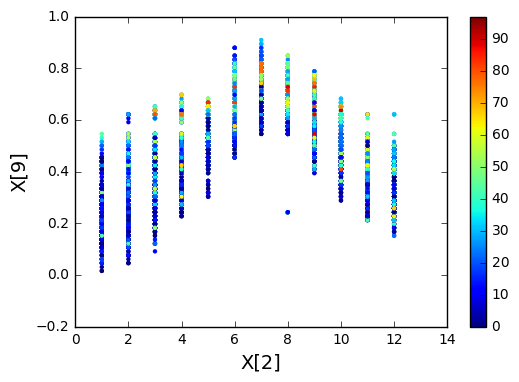

In [274]:
# First, we divide the output into sections of [yi, yi+10], in the sense of classification by magnitude,
# because using 977 classes is meaningless.
print('max label (y)=', np.amax(y))    # Consider record maximum no. of bicycles = 977
y2 = np.zeros_like(y)
for i in range(len(y)):
    y2[i] = int(y[i]/10)

# Scatterplot (we use colormap to show variance in the classes)
idx_1 = 2 # you can choose index of the first feature to plot (anything from 0 ~ 11)
idx_2 = 9 # you can choose index of the second feature to plot

plt.scatter(X[:, idx_1], X[:, idx_2], marker='o', edgecolors='none', s=10, c=y2)   
# s=size of points; c=color-labeling of points based on target values (y2)
# refer to http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.colorbar()
plt.xlabel('X[%d]' % idx_1, fontsize=14)
plt.ylabel('X[%d]' % idx_2, fontsize=14)

"""===================Discussion of results==================
Consider the following features:
X[0] =season      X[1] = year     X[2] = month   X[3] = hour   X[4]=holiday   X[5]=weekday 
X[6]=workingday   X[7] = weather  X[8] = temp    X[9] = atemp  X[10] = hum    X[11]=wind

1. X[0] ~ X[2] (linear) : Can leave out either seasons or months. Seasons is more simpler as it has only 4 values.
                          We choose either one; it's a tradeoff between model complexity and variance captured.
2. X[2] ~ X[9] (normal?): Captures more information (distribution, color separation, ...) compared to plotting X[0] with X[9].
                          Hence we should choose months and ignore seasons.
3. X[8] ~ X[9] (linear) : As discussed before, these are pretty similar. On an additional note, it seems that temperature alone
                         can capture most of the variance, since it separates the colors to some appreciable degree.
4. X[8] ~ X[10] (?)     : Looks pretty, separates colors to some degree
5. X[9] ~ X[11] (?)     : Separates colors better than X[8] with X[10]. Further shows why we should choose atemp and not temp.
"""

**Goal:** Standardize the time-related variables and combine them into one variable called "timefact" to reduce complexity

In [275]:
# First, check range of values for the features
print('0 max season=', np.amax(X[:,0]))
print('1 max year=', np.amax(X[:,1]))
print('2 max month=', np.amax(X[:,2]))
print('3 max hour=', np.amax(X[:,3]))
print('4 max holiday=', np.amax(X[:,4]))
print('5 max weekday=', np.amax(X[:,5]))
print('6 max workday=', np.amax(X[:,6]))    
print('7 max weather=', np.amax(X[:,7]))
print('8 max temp=', np.amax(X[:,8]))
print('9 max atemp=', np.amax(X[:,9]))
print('10 max hum=', np.amax(X[:,10]))
print('11 max wind=', np.amax(X[:,11]))    

0 max season= 4.0
1 max year= 1.0
2 max month= 12.0
3 max hour= 23.0
4 max holiday= 1.0
5 max weekday= 6.0
6 max workday= 1.0
7 max weather= 4.0
8 max temp= 1.0
9 max atemp= 0.9091
10 max hum= 1.0
11 max wind= 0.8507


**Comment:** We see that features X[8] to X[11] all range between 0 and 1. 
Hence we need to introduce a time factor variable "timefact" that accounts for all seasons/year/month/hour, and standardized between 0 and 1 as well. 

But I think we should not use standard scaling which assumes normal distribution, as this variable is obviously not centered at 0, nor has variance of 1.

X[0]: 0 to 4 seasons --> Ignore as argued above, otherwise standardize between sin(0)=0, sin(pi/2)=1; use x*pi/8

X[1]: Ignore, predictions shouldn't be affected by the year. Plotting X[1] with X[9] shows our results do change with year,
      but I think there is no reasonable way to physically explain why year is the cause of this change?

X[2]: 0 to 12 mths --> standardize between sin(0)=0, sin(pi/2)=1; use x*pi/24

X[3]: 0 to 23 hrs  --> similarly, use x*pi/46

X[4]: 0 to 1 --> leave as is

X[5]: 0 to 6 --> use x*pi/12

X[6]: 0 to 1 --> leave as is

Hence, we take "timefact" = 1/5 * {X[2] + X[3] + ... X[6]}    (weight of 1/5 each)

'===================Discussion of results==================\n'

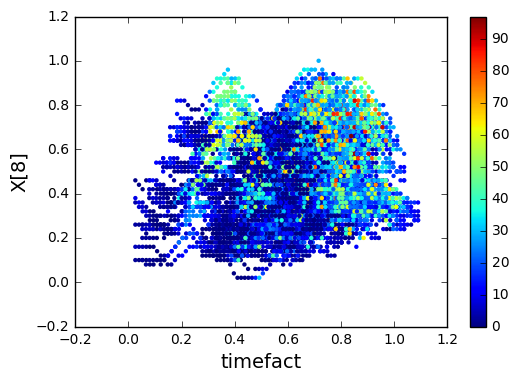

In [276]:
# Plot timefact against the remaining variables from X[7] to X[11]
timefact = np.zeros_like(X[:,0])
timefact = 1/5 * ( X[:,2]*pi/24 + X[:,3]*pi/46 + X[:,4] + X[:,5]*pi/12 + X[:,6] )

idx_1 = timefact
idx_2 = 8   # 7 to 11

plt.scatter(timefact, X[:, idx_2], marker='o', edgecolors='none', s=10, c=y2)   
# s=size of points; c=color-labeling of points based on target values (y2)
plt.colorbar()
plt.xlabel('timefact' % idx_1, fontsize=14)
plt.ylabel('X[%d]' % idx_2, fontsize=14)

"""===================Discussion of results==================
"""


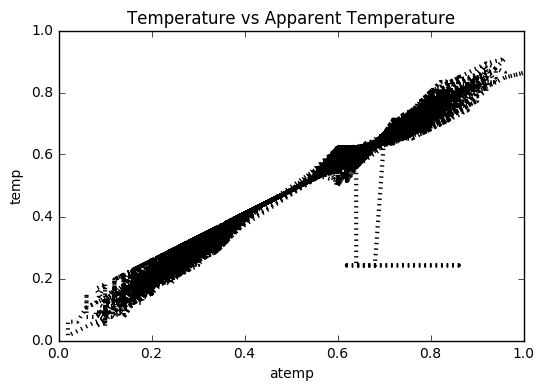

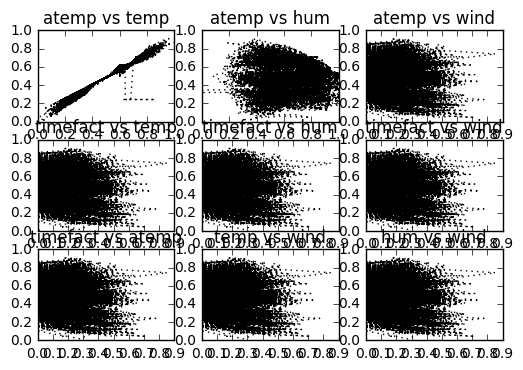

In [277]:

"""===============Previous work on plots (last updated November) ================="""

# Plot linear relationship between apparent temperature and temperature

plt.plot(temp, atemp, color='black', linestyle=':', linewidth=3)
plt.xlabel("atemp", fontsize=10)
plt.ylabel("temp", fontsize = 10)
plt.title("Temperature vs Apparent Temperature")
#savefig('Figures/temp-vs-atemp.png')          # note to mathias: "y vs x" by convention

"""Note from kaggle: atemp - apparent temperature in Celsius, normalized by dividing by the highest 
apparent temperature over these two years (float, [0, 1]). Apparent temperature quantifies the 
temperature perceived by humans, combining wind chill, humidity, and actual temperature."""

# What can we say about the relation between atem and humidity / windspeed??

fig = plt.figure()

fig1 = fig.add_subplot(331)
plt.plot(temp, atemp, color='black', linestyle=':', linewidth=1)
fig2 = fig.add_subplot(332)
plt.plot(hum, atemp, color='black', linestyle=':', linewidth=1)
fig3 = fig.add_subplot(333)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig4 = fig.add_subplot(334)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig5 = fig.add_subplot(335)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig6 = fig.add_subplot(336)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig7 = fig.add_subplot(337)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig8 = fig.add_subplot(338)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)
fig9 = fig.add_subplot(339)
plt.plot(windspeed, atemp, color='black', linestyle=':', linewidth=1)

fig1.set_title('atemp vs temp')
fig2.set_title('atemp vs hum')
fig3.set_title('atemp vs wind')
fig4.set_title('timefact vs temp')
fig5.set_title('timefact vs hum')
fig6.set_title('timefact vs wind')
fig7.set_title('timefact vs atemp')
fig8.set_title('temp vs wind')
fig9.set_title('hum vs wind')

#savefig('Figures/atemp-vs-others.png')